In [2]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

In [3]:
from proj1_helpers import *
DATA_TRAIN_PATH = '../data/train.csv' # TODO: download train data and supply path here 
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)

In [4]:
DATA_TEST_PATH = '../data/test.csv' # TODO: download train data and supply path here 
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)

In [5]:
names = np.genfromtxt(DATA_TRAIN_PATH, delimiter=",", names=True, dtype=str).dtype.names

In [6]:
from data_processing import *
from implementations import *

In [7]:
train_tx, train_y, val_tx, val_y, test_tx, test_y = preprocessing(tX, y, tX_test, _, dtype = 'mean')

In [8]:
import pandas as pd
import seaborn as sns

In [9]:
df_mean = pd.DataFrame(train_tx[:,1:], columns = np.array(names[2:]))
df_mean['y'] = train_y[:]

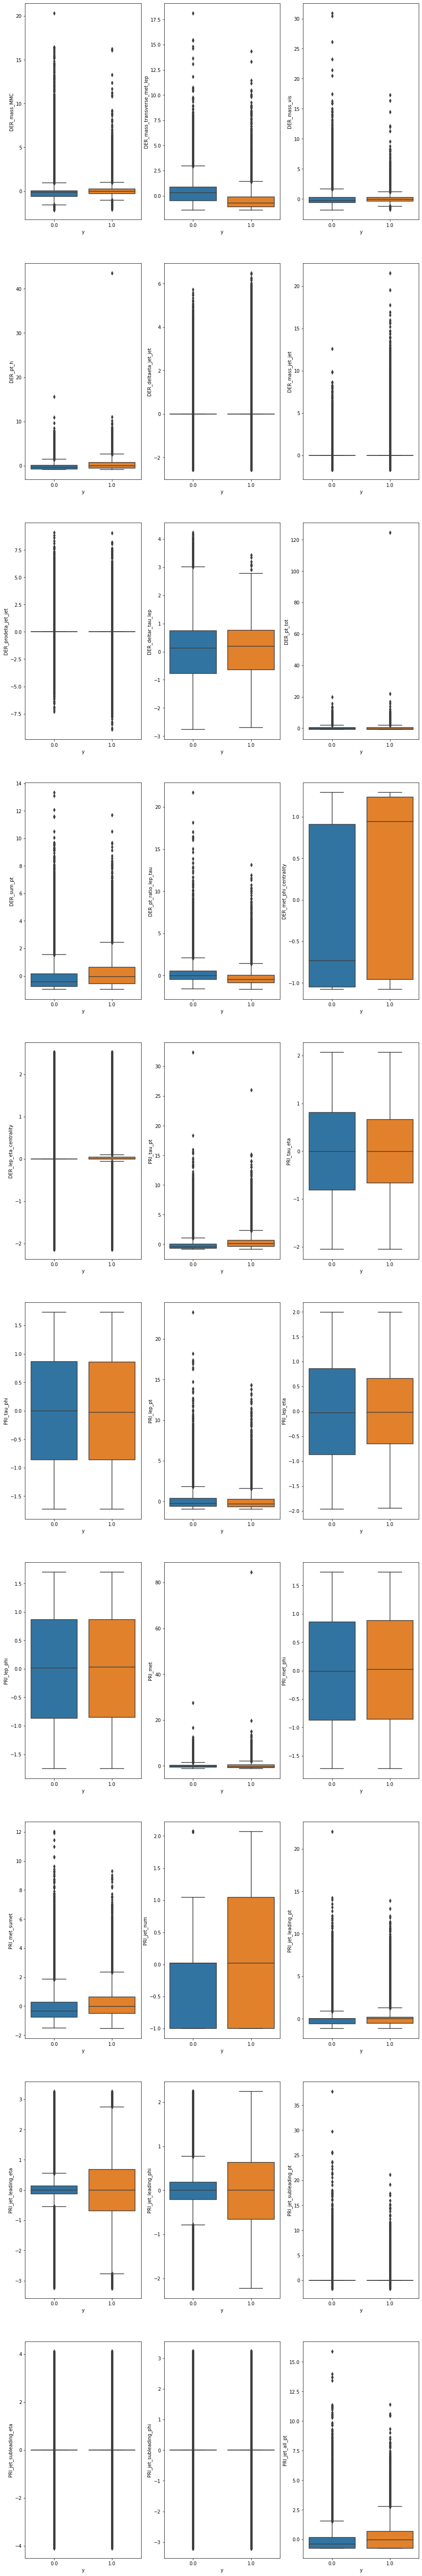

In [10]:
col = np.ravel(np.indices((3, 10))[0].T)
row = np.ravel(np.indices((3, 10))[1].T)
fig, axs = plt.subplots(ncols=3, nrows=len(names[2:])//3, figsize=(15,100))
for i in range(len(names[2:])):
    sns.boxplot(x = 'y', y = names[i+2], data = df_mean, ax = axs[row[i],col[i]])

In [12]:
df_mean_raw = pd.DataFrame(tX, columns = np.array(names[2:]))
df_mean_raw['y'] = y[:]

(211886,)


ValueError: Buffer has wrong number of dimensions (expected 1, got 0)

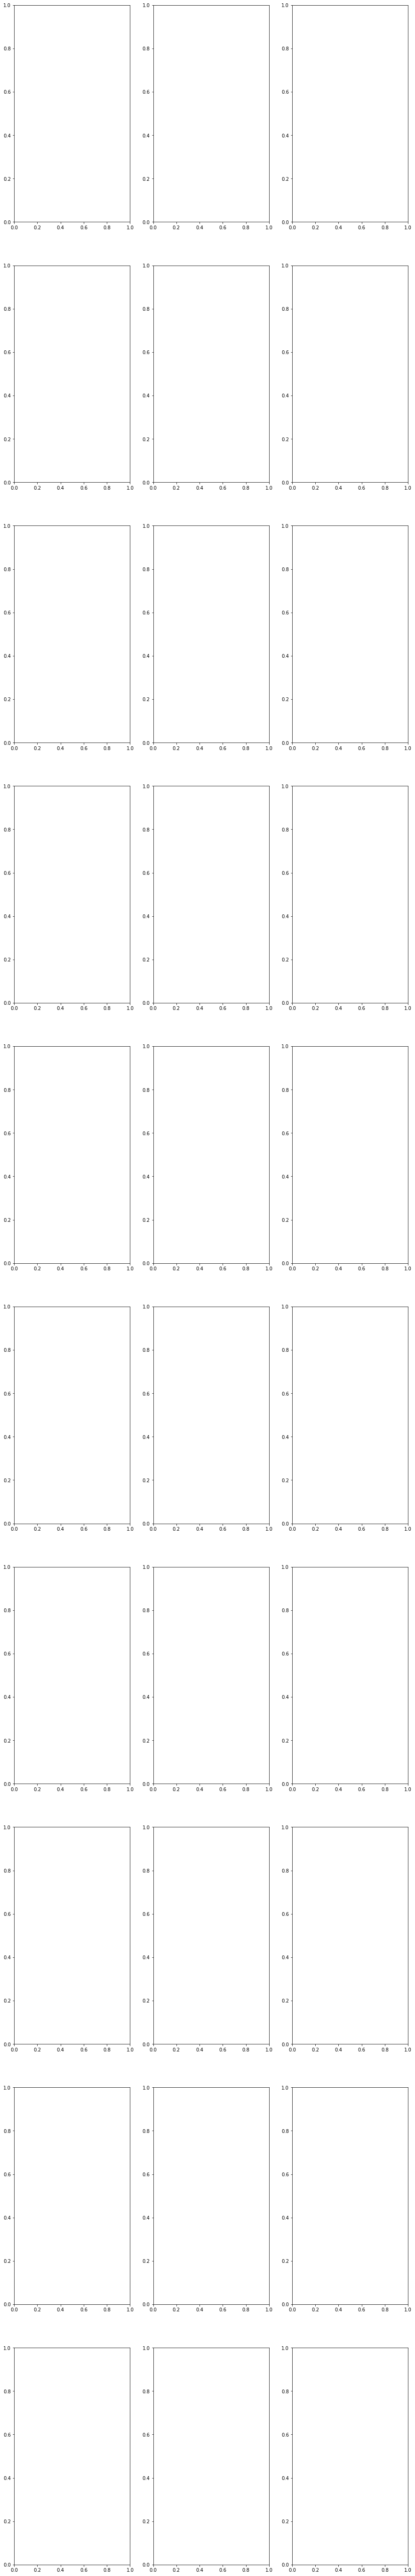

In [19]:
col = np.ravel(np.indices((3, 10))[0].T)
row = np.ravel(np.indices((3, 10))[1].T)

fig, axs = plt.subplots(ncols=3, nrows=len(names[2:])//3, figsize=(15,100))
for i in range(len(names[2:])):
    missing_idx = np.where(tX[:,i]==-999)[0]
    tX_tmp = np.delete(tX[:,i], missing_idx)
    print(tX_tmp.shape)
    df_tmp = pd.DataFrame(tX_tmp, columns = np.array(names[i+2]))
    sns.boxplot(x = 'y', y = names[i+2], data = df_tmp, ax = axs[row[i],col[i]])

15 remaining features, degree 1
There are 73.356% correct prediction in the training set
There are 73.26533333333333% correct prediction in the validation set
15 remaining features, degree 10
There are 79.94114285714285% correct prediction in the training set
There are 79.932% correct prediction in the validation set


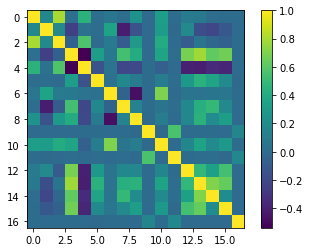

In [180]:
# Removal test
idxx = [5,6,7,10,13,16,19,21,26,27,28,29,30]
#[1,3,8,9,10,11,12,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]
train_tx_tests = np.delete(train_tx, idxx, 1)
#val_tx_tests = np.delete(val_tx, [12, 13, 16, 19, 21], 1)
val_tx_tests = np.delete(val_tx, idxx, 1)

indexes = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
train_poly_tests = build_poly_tx(train_tx_tests, idx=indexes, degree=8)
val_poly_tests = build_poly_tx(val_tx_tests, idx=indexes, degree=8)

print('15 remaining features, degree 1')
w_tests, _ = least_squares(train_y, train_tx_tests)
train_score, test_score = accuracy(train_tx_tests, train_y, val_tx_tests, val_y, w_tests, print_ = True)

print('15 remaining features, degree 10')
w_poly_tests, _ = least_squares(train_y, train_poly_tests)
train_score, test_score = accuracy(train_poly_tests, train_y, val_poly_tests, val_y, w_poly_tests, print_ = True)

coeff_matrix = np.corrcoef(train_tx_tests[:,1:].T)
ax = plt.imshow(coeff_matrix)
plt.colorbar()

In [151]:
def build_poly_tx(tx, idx, degree):
    """polynomial basis functions for input data x, for j=0 up to j=degree."""
    new_tx = tx.copy()
    new_tx = np.delete(new_tx, idx, axis = 1)
    for i in idx:
        poly = np.power(tx[:,i], 1)
        for deg in range(2, degree+1):
            poly = np.c_[poly, np.power(tx[:,i], deg)]
        new_tx = np.hstack((new_tx, poly))
    return new_tx

#### EXPAND RELEVANT FEATURES - KEEP OTHERS

#indexes = [1,3,8,9,10,11,12,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]
#indexes = [1,2,3,4,5,6,7,8,9,11,12,13,14,15,17,18,20,22,23,24,25,26,27,28,29]
#indexes = [2,4,5,6,7,13,14]
indexes = [1,2,3,4,8,9,11,12,14,15,17,18,20,22,23]
train_poly_test = build_poly_tx(train_tx, idx=indexes, degree=8)
val_poly_test = build_poly_tx(val_tx, idx=indexes, degree=8)
#print(train_tx.shape)
#print(poly_test.shape)
w_poly_tests, loss_poly_tests = least_squares(train_y, train_poly_test)
train_score, test_score = accuracy(train_poly_test, train_y, val_poly_test, val_y, w_poly_tests, print_ = True)

There are 80.42342857142857% correct prediction in the training set
There are 80.49199999999999% correct prediction in the validation set


In [119]:
#### EXPAND RELEVANT FEATURES - REMOVE OTHERS (not done yet)

train_tx_tests = np.delete(train_tx, [1,3,8,9,10,11,12,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30], 1)
#val_tx_tests = np.delete(val_tx, [12, 13, 16, 19, 21], 1)
val_tx_tests = np.delete(val_tx, [1,3,8,9,10,11,12,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30], 1)

#indexes = [1,3,8,9,10,11,12,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]
#indexes = [2,4,5,6,7,13,14]
indexes = [1,2,3,4,5,6,7]
train_poly_test = build_poly_tx(train_tx_tests, idx=indexes, degree=8)
val_poly_test = build_poly_tx(val_tx_tests, idx=indexes, degree=8)
print(train_tx.shape)
print(train_poly_test.shape)
w_poly_tests, loss_poly_tests = least_squares(train_y, train_poly_test)
train_score, test_score = accuracy(train_poly_test, train_y, val_poly_test, val_y, w_poly_tests, print_ = True)

(175000, 31)
(175000, 57)
There are 75.00457142857144% correct prediction in the training set
There are 75.22266666666667% correct prediction in the validation set


There are 65.77371428571429% correct prediction in the training set
There are 65.63866666666667% correct prediction in the validation set
There are 69.03371428571428% correct prediction in the training set
There are 68.94666666666667% correct prediction in the validation set
There are 65.77371428571429% correct prediction in the training set
There are 65.63866666666667% correct prediction in the validation set
There are 66.50914285714286% correct prediction in the training set
There are 66.42933333333333% correct prediction in the validation set
There are 65.77371428571429% correct prediction in the training set
There are 65.63866666666667% correct prediction in the validation set
There are 65.77371428571429% correct prediction in the training set
There are 65.63866666666667% correct prediction in the validation set
There are 65.77371428571429% correct prediction in the training set
There are 65.63866666666667% correct prediction in the validation set
There are 65.83428571428571% corre

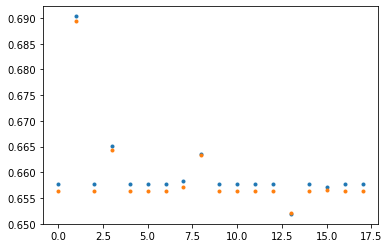

In [172]:
# Check accuracy for each feature
train_accuracies = []
test_accuracies = []
for i in range(train_tx_tests.shape[1]):
    if i!=0:
        train_tx_tmp = np.array([np.ones(len(train_tx_tests[:,i])), train_tx_tests[:,i]]).T
        val_tx_tmp = np.array([np.ones(len(val_tx_tests[:,i])), val_tx_tests[:,i]]).T
        w_tmp, loss_tmp = least_squares(train_y, train_tx_tmp)
        train_score, test_score = accuracy(train_tx_tmp, train_y, val_tx_tmp, val_y, w_tmp, print_ = True)
        train_accuracies.append(train_score)
        test_accuracies.append(test_score)
    
plt.plot(train_accuracies, '.')
plt.plot(test_accuracies, '.')

In [35]:
from implementations import*
from proj1_helpers import accuracy

There are 74.42571428571428% correct prediction in the training set
There are 74.40133333333333% correct prediction in the validation set


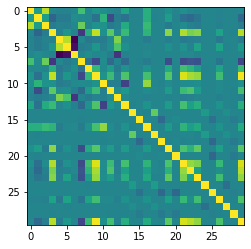

In [70]:
# All features
coeff_matrix = np.corrcoef(train_tx[:,1:].T)
ax = plt.imshow(coeff_matrix)

w1, loss1 = least_squares(train_y, train_tx)
train_score, test_score = accuracy(train_tx, train_y, val_tx, val_y, w1, print_ = True)

In [39]:
# Without the 3 non-relevant features
train_tx2 = np.delete(train_tx, [16, 19, 21], 1)
val_tx2 = np.delete(val_tx, [16, 19, 21], 1)

In [41]:
w2, loss2 = least_squares(train_y, train_tx2)
train_score, test_score = accuracy(train_tx2, train_y, val_tx2, val_y, w2, print_ = True)

There are 74.43257142857142% correct prediction in the training set
There are 74.41066666666667% correct prediction in the validation set


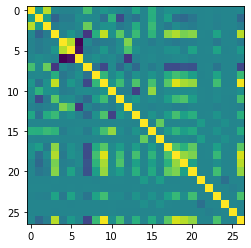

In [42]:
coeff_matrix = np.corrcoef(train_tx2[:,1:].T)
ax = plt.imshow(coeff_matrix)

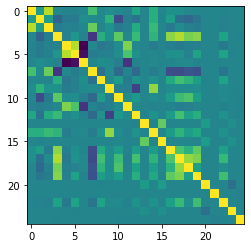

In [85]:
train_tx3 = np.delete(train_tx, [10, 16, 19, 21, 30], 1)
coeff_matrix = np.corrcoef(train_tx3[:,1:].T)
ax = plt.imshow(coeff_matrix)

In [86]:
val_tx3 = np.delete(val_tx, [10, 16, 19, 21, 22], 1)
w3, loss3 = least_squares(train_y, train_tx3)
train_score, test_score = accuracy(train_tx3, train_y, val_tx3, val_y, w3, print_ = True)

There are 74.41485714285714% correct prediction in the training set
There are 74.444% correct prediction in the validation set


In [68]:
tX_tmp = tX.copy()
tX_tmp[tX==-999] = np.nan
variances = np.nanvar(tX_tmp, axis=0)
means = np.nanmean(tX_tmp, axis=0)

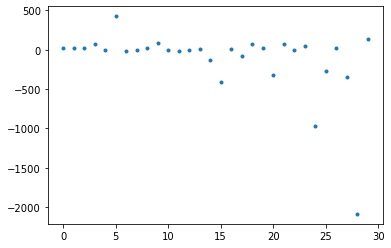

In [69]:
plt.plot(variances/means, '.')

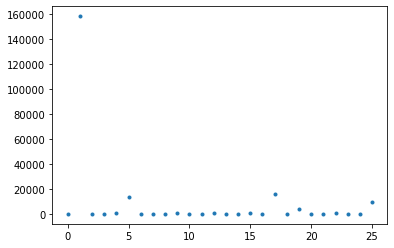

In [66]:
plt.plot(variances[:], '.')

In [139]:
indexes = [1,2,3,4,5,6,7,8,9,11,12,13,14,15,17,18,20,22,23,24,25,26,27,28,29]

train_poly = build_poly_tx(train_tx, idx=indexes, degree=8)
val_poly = build_poly_tx(val_tx, idx=indexes, degree=8)
test_poly = build_poly_tx(test_tx, idx=indexes, degree=8)
print(test_poly.shape)

weights_final, loss_final = least_squares(train_y, train_poly)
train_score, test_score = accuracy(train_poly, train_y, val_poly, val_y, weights_final, print_ = True)

OUTPUT_PATH = '../data/sample-submission.csv' # TODO: fill in desired name of output file for submission
y_pred = predict_labels(weights_final, test_poly)
y_pred[y_pred==0] = -1
print(y_pred.shape)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)

(568238, 206)
There are 81.06% correct prediction in the training set
There are 81.05466666666666% correct prediction in the validation set
(568238,)


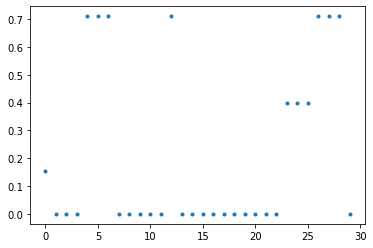

In [146]:
missing_proportions = []
for i in range(tX.shape[1]):
    prop = len(tX[tX[:,i]==-999]) / len(tX[:,i])
    missing_proportions.append(prop)

plt.plot(missing_proportions, '.')